In [12]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib qt5
import pandas as pd
import numpy as np
plt.style.use("seaborn")

In [1]:
h = ["n", "l", "vi", "v", "vf", "vi_fwd", "vf_fwd", "v1", "v_int", "v2", "s_int", "s1", "s2", "msk", "a"]
data = pd.read_csv("test.csv", names=h)

NameError: name 'pd' is not defined

In [14]:
bit_mask = [bin(i) for i in data["msk"]]
data["msk"] = bit_mask

KeyError: 'msk'

In [15]:
# data = data.reindex(data.index[::-1])
# data.reset_index(drop=True, inplace = True)
data

,n,t,tt,lmbd,lambda * block_length,f,x,y,z
0,20,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,20,0.005,0.005,0.000125,0.001250,30.000000,0.0,0.0,0.0
2,20,0.010,0.010,0.000500,0.005000,60.000000,0.0,0.0,0.0
3,20,0.015,0.015,0.001125,0.011250,90.000000,0.0,0.0,0.0
4,20,0.020,0.020,0.002000,0.020000,120.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
724,160,0.455,3.620,0.949163,9.491632,1617.413024,0.0,0.0,0.0
725,160,0.460,3.625,0.962517,9.625167,1587.413024,0.0,0.0,0.0
726,160,0.465,3.630,0.975620,9.756201,1557.413024,0.0,0.0,0.0
727,160,0.470,3.635,0.988474,9.884735,1527.413024,0.0,0.0,0.0


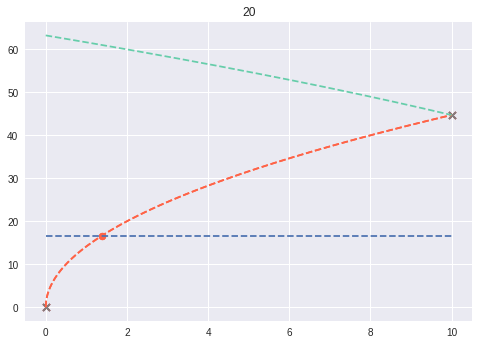

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


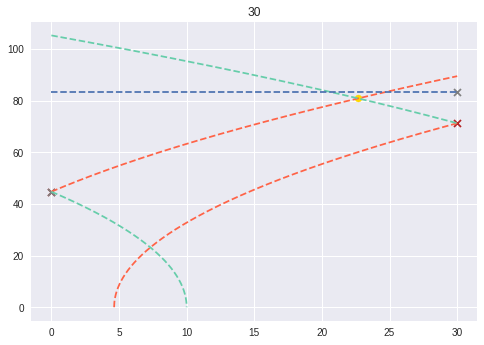

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


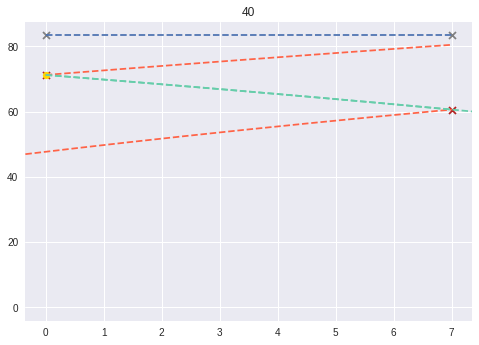

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


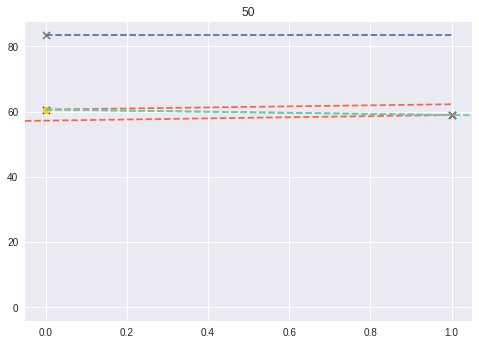

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


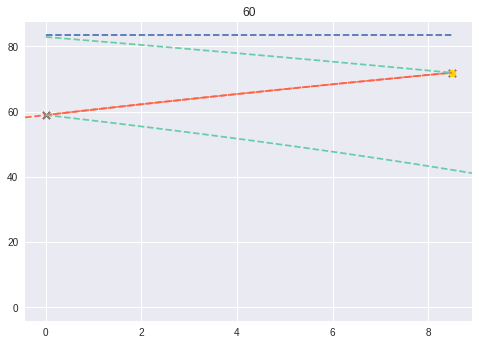

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


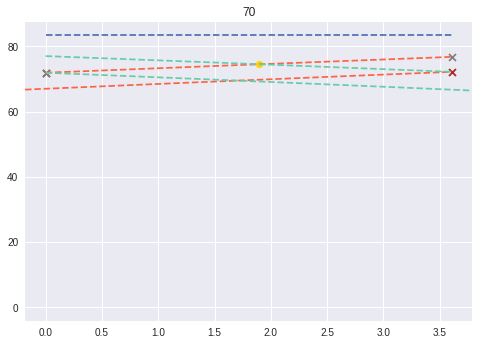

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


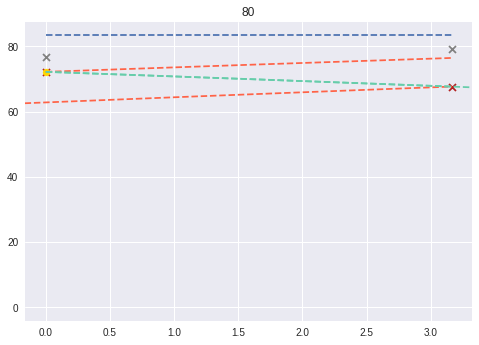

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


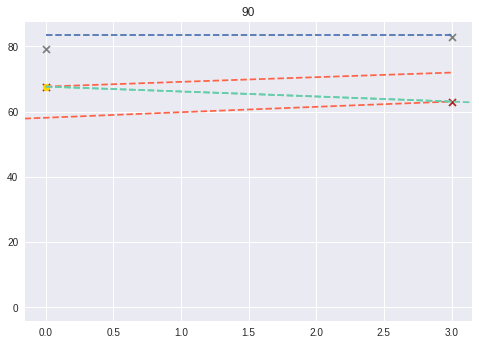

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


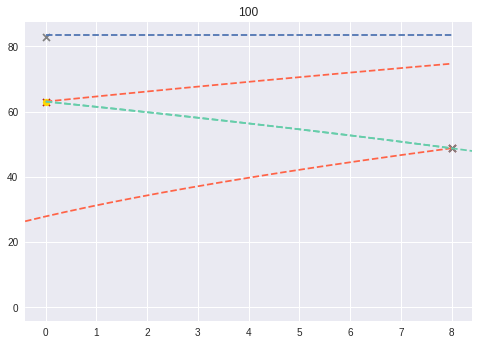

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


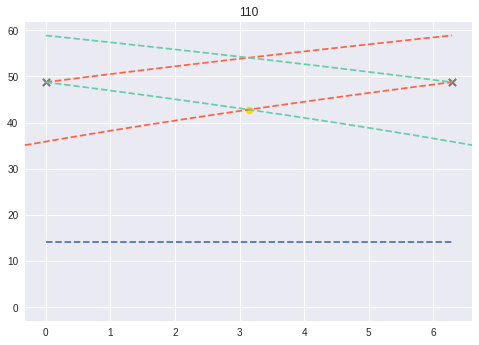

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


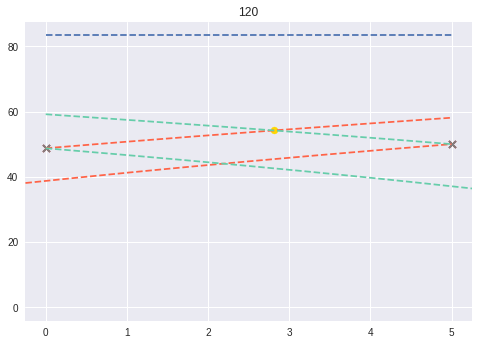

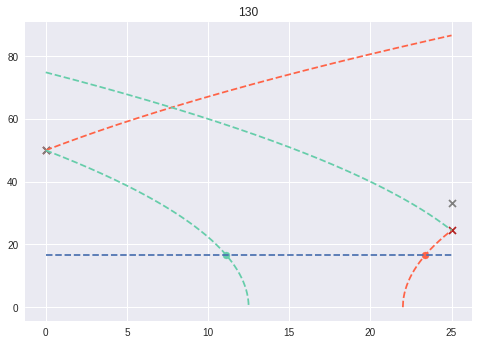

/tmp/ipykernel_18243/611801583.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


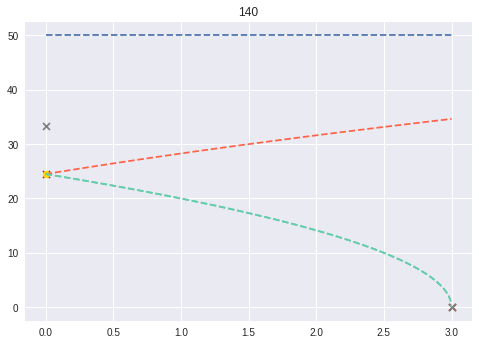

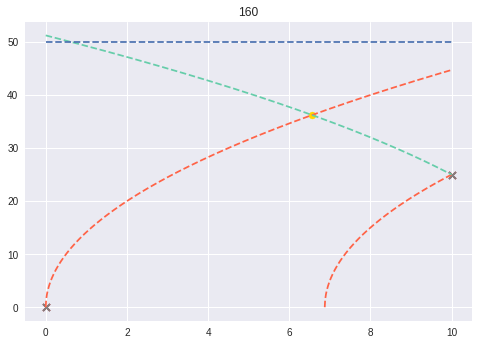

In [ ]:
howmany = 18
for i in range(howmany):
    d = data.iloc[i]
    if (int(d.msk,2)&0b01111) != 0b01111:
        step = 0.01
        s0a = d.l - (d.vf**2)/(2*d.a)
        s0d = - (d.vi**2)/(-2*d.a)

        s_a_first_point = np.arange(stop=d.l + step, step = step)
        s_a_second_point = np.arange(start=s0a, stop=d.l + step, step=step)
        s_d_first_point = np.arange(stop=s0d + step, step = step)
        s_d_second_point = np.arange(start=0, stop=d.l + step, step=step)

        v1as = np.sqrt(2*d.a * s_a_first_point + pow(d.vi,2))
        v2as = np.sqrt(2*d.a * (s_a_second_point-s0a))
        v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))
        v2ds = np.sqrt(-2*d.a * (s_d_second_point-d.l) + pow(d.vf,2))

        plt.title(d.n)
        plt.plot(s_a_first_point, v1as, linestyle="--", color="tomato")
        plt.plot(s_a_second_point, v2as, linestyle="--", color="tomato")
        plt.plot(s_d_first_point, v1ds, linestyle="--", color="mediumaquamarine")
        plt.plot(s_d_second_point, v2ds, linestyle="--", color="mediumaquamarine")

        plt.scatter(0, d.vi, color="firebrick", marker='x')
        plt.scatter(d.l, d.vf,  color="firebrick", marker = 'x')
        plt.scatter(0, d.vi_fwd, color="grey", marker='x')
        plt.scatter(d.l, d.vf_fwd,  color="grey", marker = 'x')
        plt.hlines(d.v, 0, d.l, linestyle='--')

        if (int(d.msk,2)&0b10000):
            plt.scatter(d.s_int, d.v_int, color="gold")
        else:
            color_s1 = "tomato" if (int(d.msk, 2) & 0b00100 > 0) else "mediumaquamarine"
            color_s2 = "tomato" if (int(d.msk, 2) & 0b01000 > 0) else "mediumaquamarine"
            plt.scatter(d.s1, d.v1, color=color_s1)
            plt.scatter(d.s2, d.v2, color=color_s2) 

        plt.xlim([-0.05 * d.l, d.l * (0.05 + 1)]) # extend the range of 5%
        plt.show()
    


In [ ]:
int(d.msk,2)

31

In [ ]:
0b1111

15